In [17]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [18]:
import glob, os

df = pd.DataFrame()

os.chdir("../data")
for file in glob.glob("*.csv"):
    if(file == "candidato.csv" or file == "concat.csv"):
        continue
    df_partial = pd.read_csv(file)
    df = pd.concat([df, df_partial], ignore_index=True)
df

,edit_history_tweet_ids,id,text,label
0,['1576050330114363392'],1576050330114363392,@joicehasselmann Bolsonaro NÃO quer aproveitad...,-1
1,['1576050330110160901'],1576050330110160901,o bolsonaro é um anjo enviado de deus para nos...,1
2,['1576050318852640769'],1576050318852640769,@AndradeRNegro2 @Loucosdovalle Bolsonaro é con...,1
3,['1576050318596399104'],1576050318596399104,@Victorrmsk É a milésima vez que ele fala ao v...,0
4,['1576050309822287873'],1576050309822287873,"@OGloboPolitica Bolsonaro é tão fake, q até o ...",-1
...,...,...,...,...
241,['1576039456552853504'],1576039456552853504,a pessoa não tem nem idade pra votar e ainda q...,-1
242,['1576039448760156161'],1576039448760156161,A corrupção de Lula não causou estrago só no B...,-1
243,['1576039448093265920'],1576039448093265920,eu n aguento mais essa gnt falando de política...,-1
244,['1576039446331281409'],1576039446331281409,@Emanuel_Jrz @jairbolsonaro @MariaFdaCabal O B...,1


In [19]:
df.shape

(246, 4)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_history_tweet_ids  246 non-null    object
 1   id                      246 non-null    int64 
 2   text                    246 non-null    object
 3   label                   246 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.8+ KB


In [21]:
#Check null elements

df.isnull().sum()

edit_history_tweet_ids    0
id                        0
text                      0
label                     0
dtype: int64

In [22]:
# Check duplicate rows

len(df)-len(df.drop_duplicates())

0

In [24]:
count = df['text'].str.split().str.len()
df['num_words'] = count
df.head()

,edit_history_tweet_ids,id,text,label,num_words
0,['1576050330114363392'],1576050330114363392,@joicehasselmann Bolsonaro NÃO quer aproveitad...,-1,7
1,['1576050330110160901'],1576050330110160901,o bolsonaro é um anjo enviado de deus para nos...,1,22
2,['1576050318852640769'],1576050318852640769,@AndradeRNegro2 @Loucosdovalle Bolsonaro é con...,1,28
3,['1576050318596399104'],1576050318596399104,@Victorrmsk É a milésima vez que ele fala ao v...,0,15
4,['1576050309822287873'],1576050309822287873,"@OGloboPolitica Bolsonaro é tão fake, q até o ...",-1,18


In [25]:
# Get max number of words in dataset

df['num_words'].max()

64

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'label')

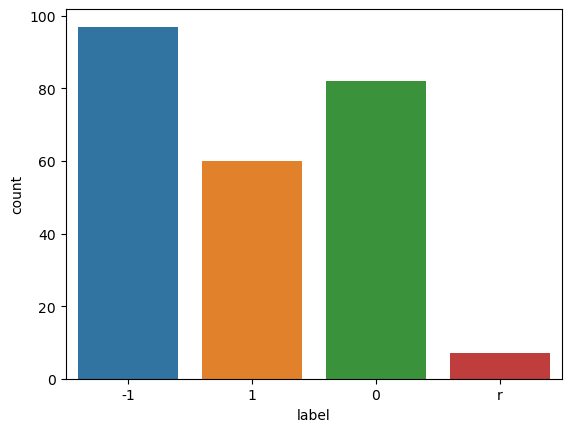

In [28]:
# Distribution of score data

sns.countplot(df['label'].apply(str))
plt.xlabel('label')

In [ ]:
df.to_csv('../data/concat.csv',index=False)